In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [9]:
df = pd.read_excel('PorCorreo.xlsx')

In [10]:
df=df[df.columns[1:]]
df.head()

,EMAIL,Bol_Vend,Prom_Pagado,%_Promo,Prom_Horas_Ant,ADULTO,PETFRIENDLY,PROMOCION ESPECIAL,DMS,ACADEMICOS,TARJETA,Primer_Compra,Prom_Dias_Entre_Compra
0,00-MAZA.ESQUISTOSO@ICLOUD.COM,4,953.664978,6.25,2.5,1.0,0.0,0.0,0.0,0.0,0.5,0,222.0
1,000047787@LAMAR.ORG.MX,1,609.909973,0.00,16.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0.0
2,0019122@UP.EDU.MX,1,1047.410034,5.00,5.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0.0
3,0022ANDREAGONZALEZ@GMAIL.COM,2,504.309998,0.00,24.5,0.0,0.0,0.0,0.0,1.0,1.0,0,11.0
4,007ITZAMNA@GMAIL.COM,1,907.760010,10.00,4.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0.0


In [4]:
X_entrenamiento = df[df.columns[1:]]
X_entrenamiento.head()

,Bol_Vend,Prom_Pagado,%_Promo,Prom_Horas_Ant,ADULTO,PETFRIENDLY,PROMOCION ESPECIAL,DMS,ACADEMICOS,TARJETA,Primer_Compra,Prom_Dias_Entre_Compra
0,4,953.664978,6.25,2.5,1.0,0.0,0.0,0.0,0.0,0.5,0,222.0
1,1,609.909973,0.00,16.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0.0
2,1,1047.410034,5.00,5.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0.0
3,2,504.309998,0.00,24.5,0.0,0.0,0.0,0.0,1.0,1.0,0,11.0
4,1,907.760010,10.00,4.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0.0


In [5]:
# --- PASO CLAVE: ESCALAR LOS DATOS ---
scaler = StandardScaler()
X_escalado = scaler.fit_transform(X_entrenamiento)
X_escalado = pd.DataFrame(X_escalado, columns=df.columns[1:])
# --- Fin del paso de escalado ---

# 3. Encontrar la K óptima (usando el Coeficiente de Silueta)
max_silhouette_score = -1
optimal_k = 0
K_range = range(2, 6)

for k in K_range:
    kmeans_model = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans_model.fit(X_escalado)
    score = silhouette_score(X_escalado, kmeans_model.labels_)
    if score > max_silhouette_score:
        max_silhouette_score = score
        optimal_k = k
print(f"El número óptimo de clusters (K) es: {optimal_k}")


El número óptimo de clusters (K) es: 5


In [6]:
# 4. Fase de Entrenamiento: Entrenar el modelo final con la K óptima
modelo_entrenado = KMeans(n_clusters=optimal_k, n_init='auto', random_state=42)
modelo_entrenado.fit(X_escalado)
df['Cluster'] = modelo_entrenado.labels_

# 5. Analizar el perfil de cada cluster
cluster_profile = df.groupby('Cluster')[df.columns[1:]].mean().round(2)

print("\n--- Perfil promedio de cada Cluster ---")
print(cluster_profile)


--- Perfil promedio de cada Cluster ---
         Bol_Vend  Prom_Pagado  %_Promo  Prom_Horas_Ant  ADULTO  PETFRIENDLY  \
Cluster                                                                        
0            1.00       949.78     6.32           54.79    0.93          0.0   
1            1.66       562.01     0.05          104.01    0.02          0.0   
2            5.41       932.98     4.14          109.44    0.92          0.0   
3            1.84       648.07     0.17          102.04    0.05          0.0   
4            1.07      1086.78     0.16           26.46    1.00          0.0   

         PROMOCION ESPECIAL   DMS  ACADEMICOS  TARJETA  Primer_Compra  \
Cluster                                                                 
0                      0.07  0.00        0.00     0.89           0.99   
1                      0.00  0.98        0.00     0.20           0.76   
2                      0.00  0.06        0.02     0.79           0.00   
3                      0.00  0.04

In [8]:
# Save the cluster profile to an Excel file
cluster_profile.to_excel('cluster_profile.xlsx')

print("Cluster profile saved to 'cluster_profile.xlsx'")

Cluster profile saved to 'cluster_profile.xlsx'


In [ ]:
df.to_excel('PorCluster.xlsx')

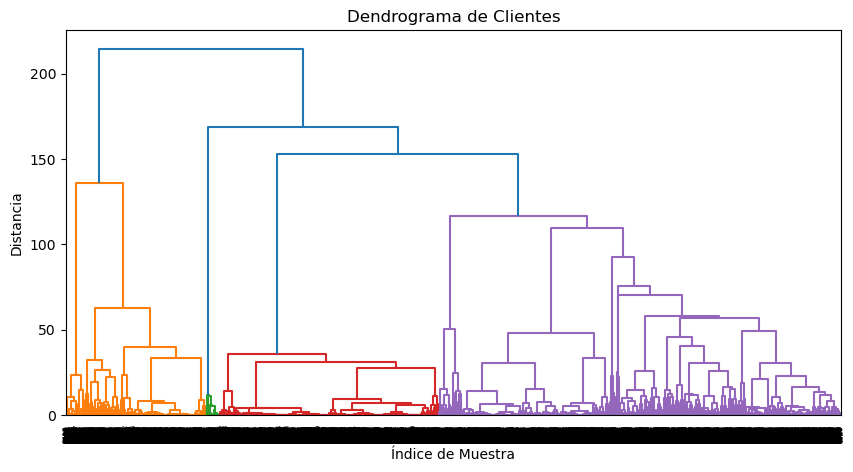

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


X = df[df.columns[1:]]

# 2. Escalar los datos
#    Esto es una buena práctica para que todas las variables tengan el mismo peso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.utils import resample

X_sample = resample(X_scaled, n_samples=10000, random_state=42)

# 3. Realizar el agrupamiento jerárquico
#    El método 'ward' minimiza la varianza de los clústeres fusionados
linkage_matrix = linkage(X_sample, method='ward')

# 4. Generar el dendrograma
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Dendrograma de Clientes')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()